# LLE on HSI data - SalinasA

In [1]:
from umap_script import loadHSI, show_clusterable_embedding, visualize_umap, compare_umap, k_means, calculate_aligned_accuracy, plot

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
salinasA_path = 'data/SalinasA_corrected.mat'
salinasA_gt_path = 'data/SalinasA_gt.mat'

X, M, N, D, HSI, GT, Y, n, K = loadHSI(salinasA_path, salinasA_gt_path, 'salinasA_corrected', 'salinasA_gt')

In [3]:
print(HSI.shape)
print(GT.shape)

(7138, 204)
(83, 86)


In [4]:
def LLE_projection_2d(hsi_data,ground_truth,num):
    LLE = LocallyLinearEmbedding(n_neighbors=num,n_components=3)
    embedding = LLE.fit_transform(hsi_data)

    # Visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=ground_truth.ravel(), s=0.1, cmap='Spectral')
    plt.title('2D LLE (Local Linear Embedding) Projection of the Dataset')
    plt.colorbar(scatter, label='Spectral classes')
    plt.xlabel('LLE 1')
    plt.ylabel('LLE 2')
    plt.show()

Number of neighbors = 1000

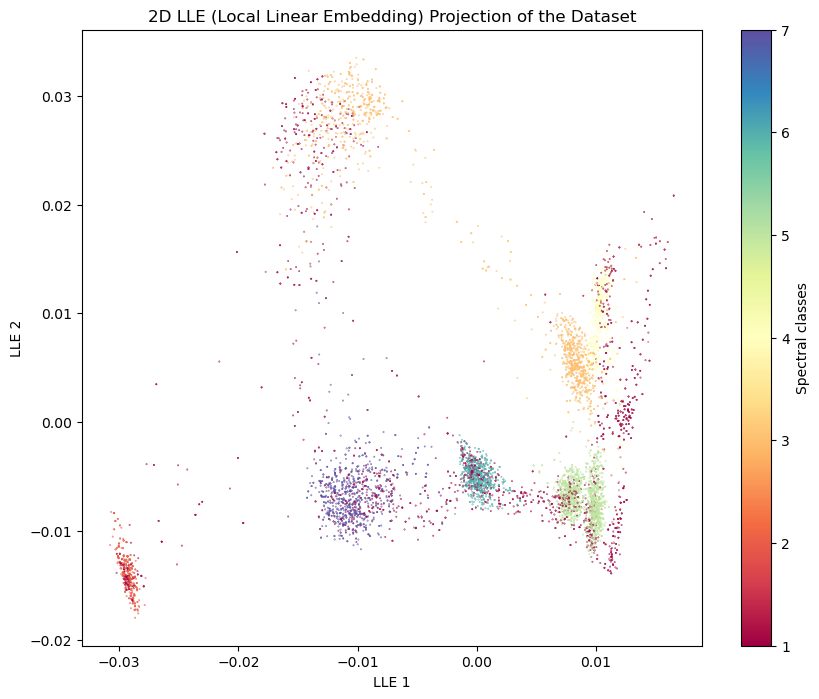

In [8]:
LLE_projection_2d(HSI,GT,1000)

Number of neighbors - 5 (default)

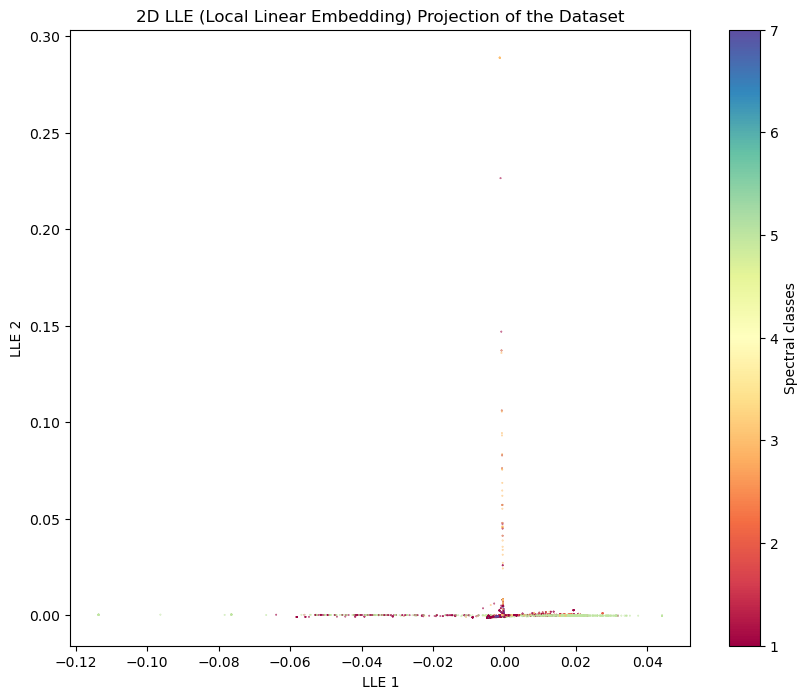

In [9]:
LLE_projection_2d(HSI,GT,5)

In [6]:
def visualize_lle(hsi_data,num,title=''):
    LLE = LocallyLinearEmbedding(n_neighbors=num,n_components=3)
    u = LLE.fit_transform(hsi_data)
    plt.title(title, fontsize=18)
    return u

array([[-0.04178902,  0.01059917, -0.00022318],
       [-0.04178903,  0.0105997 , -0.00021813],
       [-0.04178903,  0.0105999 , -0.00021945],
       ...,
       [ 0.00579372,  0.00937006,  0.01472162],
       [ 0.00587569,  0.00972564,  0.01390949],
       [ 0.0058475 ,  0.0097145 ,  0.01004745]])

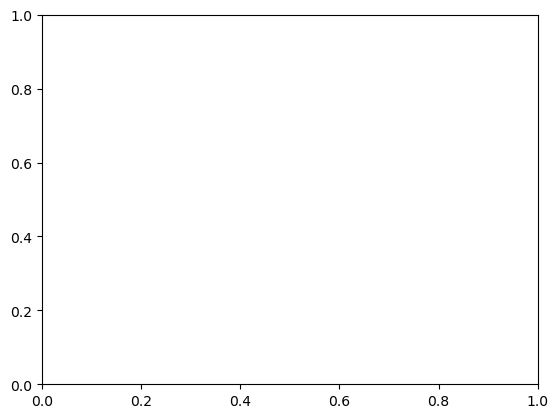

In [10]:
visualize_lle(HSI,50)

0.4653060707359879
[2 2 2 ... 0 0 0]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.4653060707359879, array([2, 2, 2, ..., 0, 0, 0], dtype=int32))

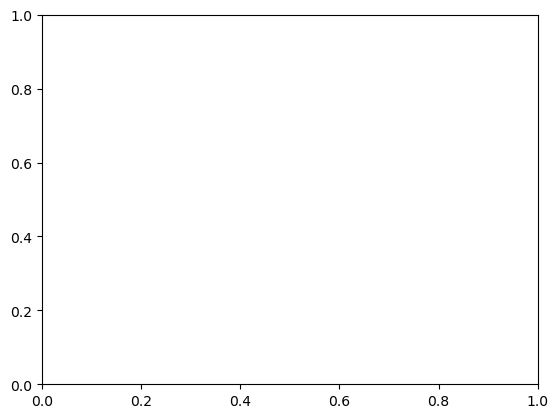

In [14]:
k_means(GT,dim_reduced_data = visualize_lle(HSI,num=50),n_components=3,method = "LLE")

In [12]:
def compare_pca(data,ground_truth,dataset_name,compare_dim,compare_neighbors):
    lle_ari = []
    lle_aligned_acc = []
    pca_ari = []
    pca_aligned_acc = []
    dims = [400,600,800,1000]
    pca_dims = [1,2,3,4]
    for i in range(1,len(dims)):            
        lle_plot = visualize_lle(data,num=dims[i])
        k_means_lle_ari, k_means_lle_labels = k_means(ground_truth,dim_reduced_data = lle_plot, n_components = dims[i], method = "LLE")
        k_means_pca_ari, k_means_pca_labels = k_means(ground_truth, data = data, n_components= pca_dims[i], method = "PCA")

        lle_ari.append(k_means_lle_ari)
        pca_ari.append(k_means_pca_ari)

        lle_acc = calculate_aligned_accuracy(ground_truth, k_means_lle_labels)
        pca_acc = calculate_aligned_accuracy(ground_truth, k_means_pca_labels)

        lle_aligned_acc.append(lle_acc)
        pca_aligned_acc.append(pca_acc)
    dims = dims[1:]
    plot(dims,lle_ari, pca_ari,lle_aligned_acc,pca_aligned_acc, plot_title = 'Adjusted Rand Index (ARI) vs. Number of Neighbors for' + dataset_name, x_label = 'Number of Neighbors', dim_label = 'LLE (Local Linear Embedding)')

In [13]:
compare_pca(HSI,GT,"Salinas A", True, True)

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.3170340225197159
[0 0 0 ... 6 6 6]
0.3790962416831678
[3 3 3 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.39043446236279167
[3 3 3 ... 0 0 0]
